## SECOM Data Set Information

A complex modern semi-conductor manufacturing process is normally under consistent surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. It is often the case  that useful information is buried in the latter two. Engineers typically have a much larger number of signals than are actually required. If we consider each type  of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs.

Numerical data are recorded values from a series of sensors in the production machines that are placed in specified locations to help identify the part of the production process which contributes to the faults.


# Objective
To minimize the rate at which faulty products leave the factory, the numerical data starts to make sense. 

*   To enhance current business improvement techniques, we use feature selection techniques to rank features according to their impact on the overall yield for the product. 

    *   Causal relationships may also be considered with a view to identifying the key features.

<h2 id="importing_libraries">Importing required libraries</h2>


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import SMOTE


import warnings
import os

warnings.filterwarnings('ignore')
%matplotlib inline

### Load Data


In [2]:
sensor_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data",sep=" ", header=None)

In [3]:
sensor_data

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [7]:
sensor_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [4]:
sensor_data.duplicated().sum()

0

# Missing values in sensor data

In [5]:
px.histogram(sensor_data.isnull().sum())

# Read label data

In [6]:
labels_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data",sep=" ",header=None)

In [7]:
labels_data

,0,1
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00
...,...,...
1562,-1,16/10/2008 15:13:00
1563,-1,16/10/2008 20:49:00
1564,-1,17/10/2008 05:26:00
1565,-1,17/10/2008 06:01:00


In [8]:
labels_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1567 non-null   int64 
 1   1       1567 non-null   object
dtypes: int64(1), object(1)
memory usage: 24.6+ KB


In [9]:
# Change column names
labels_data.columns = ["Label","Time"]

# Convert type of columns
labels_data["Label"] = labels_data["Label"].astype("category")

labels_data["Time"] = pd.to_datetime(labels_data["Time"])

# Check the frequency of labels

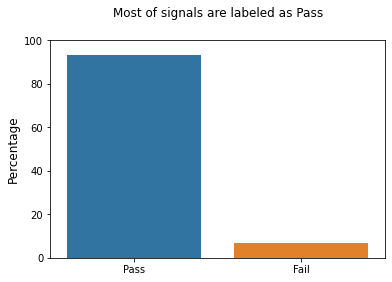

In [10]:
# Frequency table
freq_table = labels_data["Label"].value_counts(normalize=True) * 100
freq_table

# Plot frequency table
sns.barplot(x=freq_table.index,y=freq_table.values)

plt.title('Most of signals are labeled as Pass', y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Pass', 'Fail'], rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

# Merge sensor and label data

In [8]:
concat_df = pd.concat([labels_data,sensor_data],axis=1)

In [9]:
concat_df

,0,1,0,1,2,3,4,5,6,7,...,580,581,582,583,584,585,586,587,588,589
0,-1,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,-1,19/07/2008 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,1,19/07/2008 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,-1,19/07/2008 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,-1,19/07/2008 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,-1,16/10/2008 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,-1,16/10/2008 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,-1,17/10/2008 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,-1,17/10/2008 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [13]:
concat_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [14]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, 0 to Time
dtypes: category(1), datetime64[ns](1), float64(590)
memory usage: 7.1 MB


In [15]:
concat_df.duplicated().sum()

0

In [ ]:
concat_df.duplicated().sum()

In [16]:
concat_df.drop("Time",axis=1,inplace=True)

# Count the missing values

In [10]:
percent_missing = concat_df.isnull().sum() * 100 / len(concat_df)
missing_value_df = pd.DataFrame({'column_name': concat_df.columns,
                                 'percent_missing': percent_missing})

In [11]:
missing_value_df.describe()

,column_name,percent_missing
count,592.000000,592.000000
mean,293.506757,4.522219
std,171.028322,15.410102
min,0.000000,0.000000
25%,145.750000,0.127632
50%,293.500000,0.382897
75%,441.250000,0.574346
max,589.000000,91.193363


In [19]:
px.histogram(missing_value_df.percent_missing)

# Drop some variables with missing values

We select the columns having less than 55% missing values.

In [20]:
colnames = missing_value_df[missing_value_df["percent_missing"]<55]["column_name"].values

In [21]:
missings_dropped = concat_df[colnames]

In [23]:
print("{} columns were dropped".format(concat_df.shape[1] - missings_dropped.shape[1]))

24 columns were dropped


# Drop constant variables

In [24]:
unique_series = missings_dropped.nunique()
constants_dropped = missings_dropped[unique_series[unique_series != 1].index]
print("{} columns were dropped".format(missings_dropped.shape[1] - constants_dropped.shape[1]))

116 columns were dropped


In [25]:
constants_dropped.describe()

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,...,1567.000000,1567.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,101.112908,0.121822,1.462862,-0.000841,0.000146,...,5.563747,16.642363,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,73.621787,80.407705,29.513152,441.691640,56.355540,6.237214,0.008961,0.073897,0.015116,0.009302,...,16.921369,12.485267,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,82.131100,0.000000,1.191000,-0.053400,-0.034900,...,0.663600,4.582000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,97.920000,0.121100,1.411200,-0.010800,-0.005600,...,1.408450,11.501550,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,101.512200,0.122400,1.461600,-0.001300,0.000400,...,1.624500,13.817900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,104.586700,0.123800,1.516900,0.008400,0.005900,...,1.902000,17.080900,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,129.252200,0.128600,1.656400,0.074900,0.053000,...,90.423500,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


<AxesSubplot:>

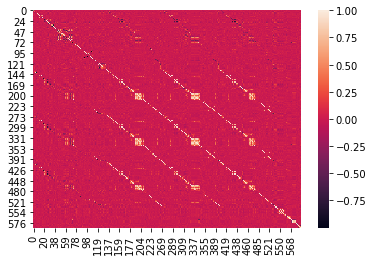

In [26]:
sns.heatmap(constants_dropped.corr())

In [27]:
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.25) #Removing both constant and quasi-constant
var_thr.fit(missings_dropped)

VarianceThreshold(threshold=0.25)

In [28]:
var_thr.fit_transform(missings_dropped)

array([[3.0309300e+03, 2.5640000e+03, 2.1877333e+03, ..., 1.4950900e+01,
        2.3630000e+00,           nan],
       [3.0957800e+03, 2.4651400e+03, 2.2304222e+03, ..., 1.0900300e+01,
        4.4447000e+00, 2.0820450e+02],
       [2.9326100e+03, 2.5599400e+03, 2.1864111e+03, ..., 9.2721000e+00,
        3.1745000e+00, 8.2860200e+01],
       ...,
       [2.9788100e+03, 2.3797800e+03, 2.2063000e+03, ..., 1.7726700e+01,
        3.0590000e+00, 4.3523100e+01],
       [2.8949200e+03, 2.5320100e+03, 2.1770333e+03, ..., 1.9210400e+01,
        3.5662000e+00, 9.3494100e+01],
       [2.9449200e+03, 2.4507600e+03, 2.1954444e+03, ..., 2.2918300e+01,
        3.6275000e+00, 1.3778440e+02]])

Two approaches are available to reduce dimensionality:

Feature extraction: creating a subset of new features by combinations of the existing features (example: PCA)

Feature selection: choosing a subset of all the features (example: Recursive Feature Elimination)

Dimensionality reduction techniques:

- Percent Missing Values
- Ammount of Variation
- Pairwise Correlation
- Correlation with Target
- Recursive feature elimination

# Create train and test dataset

before everything else, we should make our test set. 

Since according to dataset's description, target values are highly imbalanced, so I split it in a stratified fashion.

In [40]:
# Create training and test datasets
X = constants_dropped.drop(["Label"],axis=1)
Y = constants_dropped["Label"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify=Y)

In [41]:
Y_train.value_counts(normalize=True) * 100

-1    93.375898
1      6.624102
Name: Label, dtype: float64

In [42]:
Y_test.value_counts(normalize=True) * 100

-1    93.312102
1      6.687898
Name: Label, dtype: float64

# Re-label the Target values

Each failure is is encoded as 0 while 1 corresponds to a pass

In [209]:
Y_train = Y_train.replace(to_replace=[-1, 1], value=[1, 0])
Y_test = Y_test.replace(to_replace=[-1, 1], value=[1, 0])

In [210]:
fig = px.pie(
    Y_train.value_counts(),
    values='Label',
    names=["PASS", "FAIL"],
    title="Train Label Class Distribution",
    width=500
)

fig.show()

In [211]:
fig = px.pie(
    Y_test.value_counts(),
    values='Label',
    names=["PASS", "FAIL"],
    title="Test Label Class Distribution",
    width=500
)

fig.show()

In [212]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 415 to 1126
Columns: 487 entries, 0 to 589
dtypes: float64(487)
memory usage: 4.7 MB


In [213]:
type_dct = {str(k): len(list(v)) for k, v in X_train.groupby(X_train.dtypes, axis=1)}
type_dct

{'float64': 487}

In [214]:
X_train.dtypes.value_counts()

float64    487
dtype: int64

In [215]:
np.count_nonzero(X_train.isna().sum())

435

In [216]:
X_train.isna().sum().sort_values(ascending=False).head(10)


140    14
138    14
141    14
142    14
413    14
412    14
411    14
414    14
415    14
273    14
dtype: int64

# Build Logistic Regression Model and Evaluation Metrics

Before imputing missing values and removing some columns, let's build and evaluate the model in order to get the sense of whether the performance of the model increases or decreases in every step of the feature selection/removal.

Since this dataset is highly imbalanced, we must not use accuracy as our evaluation metric.

In [ ]:
# Get the number of unique values in each column
nunique = sensor_data.nunique()

# Identify constant variables
constant_vars = nunique[nunique == 1].index

# Drop constant variables from the DataFrame
sensor_data.drop(constant_vars, axis=1, inplace=True)

# Print the updated DataFrame
print(sensor_data)

          0        1          2          3       4         6       7    \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235   
...       ...      ...        ...        ...     ...       ...     ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843   82.2467  0.1248   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726   98.7978  0.1213   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978   85.1011  0.1235   

         8       9       10   ...     580       581     582     583     584  \
0     1.5005  0.0162 -0.0034  ..